# eTransafe Omeprazole Heatmap

This is the use scenario that has been described in the eTox project for exploring the differences with respect to adverse events between omeprazole preclinical and clinical. In order to compute these results the following scenario is executed:
1. Translate the provided compound (e.g., omeprazole) to a SMILES
2. Retrieve similar compounds based on structural similarity
3. Retrieve data from the preclinical and clinical databases
4. Aggregate the data per system organ class
5. Visualize the data using a heatmap

(C) 2020 Erasmus University Medical Center, Rotterdam, The Netherlands
Author: Erik M. van Mulligen, e.vanmulligen@erasmusmc.nl

In [21]:
from knowledgehub.api import KnowledgeHubAPI
import ipywidgets as w
from IPython.display import display, Javascript
from ipypublish import nb_setup
import numpy as np
import numpy.ma as ma
import seaborn as sns
import pandas
import matplotlib.pyplot as plt

In [22]:
api = KnowledgeHubAPI()

## 1. Translate compound to SMILES using semantic services
For the entered compound name, retrieve the associated SMILES using the semantic services

In [23]:
compoundName = w.Text(value='omeprazole',placeholder='compound name', description='compound:', disabled=False)
compoundBtn = w.Button(description='Retrieve')
compoundSmile = None

def on_compound_entered(_):
        compound = api.SemanticService().normalize(compoundName.value, ['RxNorm','smiles'])
        if 'concepts' in compound:
            for concept in compound['concepts']:
                if 'vocabularyId' in concept:
                    if concept['vocabularyId'] == 'smiles':
                        global compoundSmile
                        compoundSmile = concept['conceptCode']
                        print(f'Found SMILES {compoundSmile} for {compoundName.value}')
                        display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.get_selected_index()+2)'))

compoundBtn.on_click(on_compound_entered) 
w.VBox([compoundName, compoundBtn])

Found SMILES COc1ccc2[nH]c(nc2c1)[S+]([O-])Cc3ncc(C)c(OC)c3C for omeprazole


<IPython.core.display.Javascript object>

In [25]:
compoundIds = []
compoundNames = []
names = []
smiles = []
similarities = []

## 2. Retrieve similar compounds

In [26]:
similar_compounds = api.SimilarityService().get(compoundSmile, nr_results = 20)

if similar_compounds != None:
    if ('search_results' in similar_compounds) and (len(similar_compounds['search_results']) == 1):
        search_result = similar_compounds['search_results'][0]
        if 'obj_nam' in search_result:
            for i in range(len(search_result['obj_nam'])):
                names.append(search_result['obj_nam'][i])
                smiles.append(search_result['SMILES'][i])
                similarities.append("{:.4f}".format(search_result['distances'][i]))

            for cmp in search_result['obj_nam']:
                concept = api.SemanticService().normalize(cmp, ['RxNorm'])
                if 'concepts' in concept and len(concept['concepts']) == 1:
                    compoundIds.append(concept['concepts'][0]['conceptCode'])
                    compoundNames.append(concept['concepts'][0]['conceptName'])
        else:
            print('something wrong in the result object from the similarity service')    

pd = nb_setup.setup_pandas(escape_latex=False)
df = pd.DataFrame(np.random.rand(len(names),3),columns=['NAME','SMILES','SIMILARITY'])
df.NAME = names
df.SMILES = smiles
df.SIMILARITY = similarities
df.round(3)

NAME  \
0                                          Omeprazole   
1                                        Esomeprazole   
2                                         estropipate   
3                                          Dipivefrin   
4                                        lomefloxacin   
5        formoterol_/_Mometasone_Metered_Dose_Inhaler   
6             Budesonide_/_formoterol_Inhalant_Powder   
7                                        arformoterol   
8                                          formoterol   
9                                          Acebutolol   
10                                        aceclofenac   
11                                         sultopride   
12                                         pimobendan   
13                                       Epoprostenol   
14                                       voriconazole   
15                                        Fluorescein   
16                                          idebenone   
17  Clopamide_/_Dihydroergocristine_/_Reserpine_Or...   
18                                          Clopamide   
19                                       Penicillin_G   

                                               SMILES SIMILARITY  
0     COc1ccc2[nH]c([S+]([O-])Cc3ncc(C)c(OC)c3C)nc2c1     1.0000  
1   COc1ccc2[nH]c([S@@+]([O-])Cc3ncc(C)c(OC)c3C)nc2c1     0.9990  
2   C1CNCCN1.C[C@]12CC[C@@H]3c4ccc(OS(=O)(=O)O)cc4...     0.9897  
3     CNCC(O)c1ccc(OC(=O)C(C)(C)C)c(OC(=O)C(C)(C)C)c1     0.9897  
4     CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCNC(C)C3)c(F)c21     0.9885  
5            COc1ccc(CC(C)NCC(O)c2ccc(O)c(NC=O)c2)cc1     0.9880  
6            COc1ccc(CC(C)NCC(O)c2ccc(O)c(NC=O)c2)cc1     0.9880  
7   COc1ccc(C[C@@H](C)NC[C@H](O)c2ccc(O)c(NC=O)c2)cc1     0.9880  
8            COc1ccc(CC(C)NCC(O)c2ccc(O)c(NC=O)c2)cc1     0.9880  
9            CCCC(=O)Nc1ccc(OCC(O)CNC(C)C)c(C(C)=O)c1     0.9875  
10              O=C(O)COC(=O)Cc1ccccc1Nc1c(Cl)cccc1Cl     0.9873  
11            CCN1CCCC1CNC(=O)c1cc(S(=O)(=O)CC)ccc1OC     0.9873  
12      COc1ccc(-c2nc3cc(C4=NNC(=O)CC4C)ccc3[nH]2)cc1     0.9872  
13  CCCCC[C@H](O)/C=C/[C@H]1[C@H](O)C[C@@H]2O/C(=C...     0.9856  
14    C[C@@H](c1ncncc1F)[C@](O)(Cn1cncn1)c1ccc(F)cc1F     0.9850  
15        O=C(O)c1ccccc1-c1c2ccc(=O)cc-2oc2cc(O)ccc12     0.9848  
16             COC1=C(OC)C(=O)C(CCCCCCCCCCO)=C(C)C1=O     0.9846  
17         CC1CCCC(C)N1NC(=O)c1ccc(Cl)c(S(N)(=O)=O)c1     0.9842  
18         CC1CCCC(C)N1NC(=O)c1ccc(Cl)c(S(N)(=O)=O)c1     0.9842  
19  CC1(C)S[C@@H]2[C@H](NC(=O)Cc3ccccc3)C(=O)N2[C@...     0.9839

# 3. Retrieve data from the preclinical and clinical databases

In [27]:
studies = {'Medline': api.Medline().getStudiesByCompoundIds(compoundIds),
           'FAERS': api.Faers().getStudiesByCompoundIds(compoundIds),
           'ClinicalTrials': api.ClinicalTrials().getStudiesByCompoundIds(compoundIds),
           'eTOXSys': api.eToxSys().getStudiesByCompoundNames(compoundNames)}
count = 0
for source in studies:
    count += len(studies[source])
print(f'Found {count} studies.')

Found 15347 studies.


# 4. Aggregate the data per system organ class

Since the eTox data reports events with an organ. We use our own method to map it to MedDRA's system organ class to make it comparable

In [28]:
system = {}
all_compounds = [c.lower() for c in compoundNames]
socs = {}
study_labels = ['Medline', 'FAERS', 'ClinicalTrials', 'eTOXsys']

# traverse all studies and collect the system organ classes; keep track of the # studies per class
for study in studies:
    source = study['source']
    if study['FINDING']['finding'] != 'No abnormalities detected' and study['FINDING']['finding'] != 'None' and len(study['FINDING']['finding']) > 0:
        specimenOrgans = api.SemanticService().getSocs(study['FINDING']['specimenOrgan'])
        for specimenOrgan in specimenOrgans:
            if len(specimenOrgan) > 0:
                if not specimenOrgan in socs:
                    socs[specimenOrgan] = 1
                else:
                    socs[specimenOrgan] += 1
                    
# sort the socs per count
all_socs = {k: v for k, v in sorted(socs.items(), key=lambda item: item[1], reverse=True)}

# traverse all studies and create a matrix per source
for source in study_labels:
        system[source] = {'data':np.zeros((len(all_socs),len(all_compounds)), dtype=int).tolist(), 
                          'row_labels':[],
                          'rows':list(all_socs.keys()), 
                          'cols':all_compounds}
    
    if study['FINDING']['finding'] != 'No abnormalities detected' and study['FINDING']['finding'] != 'None' and len(study['FINDING']['finding']) > 0:
    # if source != 'eTOXsys' or study['FINDING']['finding'] != 'No abnormalities detected':
        specimenOrgans = api.SemanticService().getSocs(study['FINDING']['specimenOrgan'])
        for specimenOrgan in specimenOrgans:
            if len(specimenOrgan) > 0:
                row = system[source]['rows'].index(specimenOrgan)
                col = system[source]['cols'].index(study['COMPOUND']['name'].lower())
                system[source]['data'][row][col] += 1
                

# 5. Visualize the data using a heatmap

Using seaborn to visualize the content of the various databases. Note that we have to think about ways to easier compare the various results.

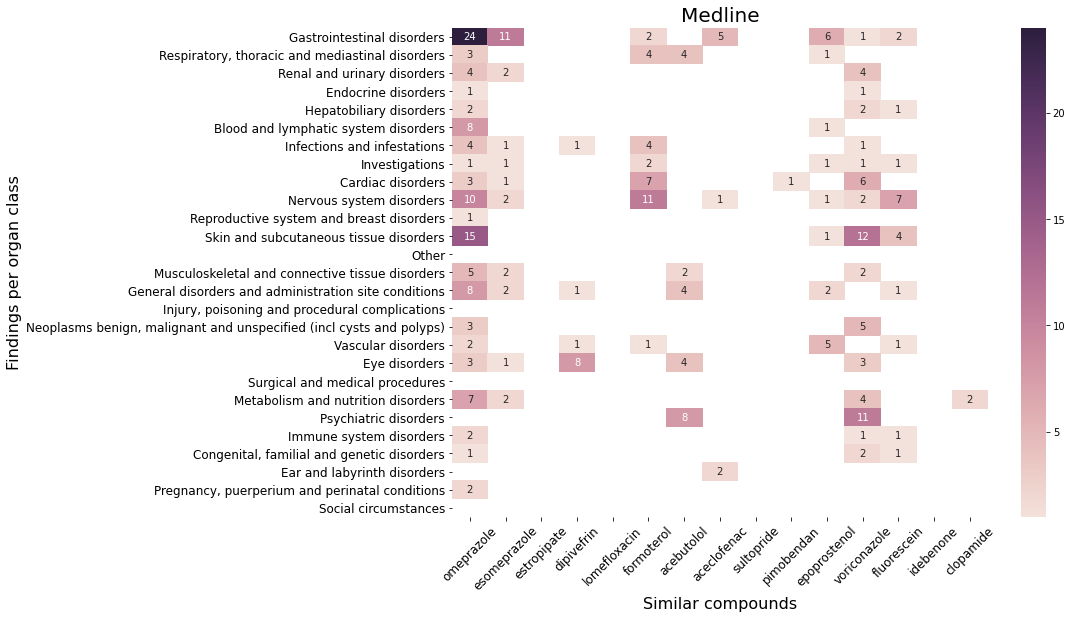

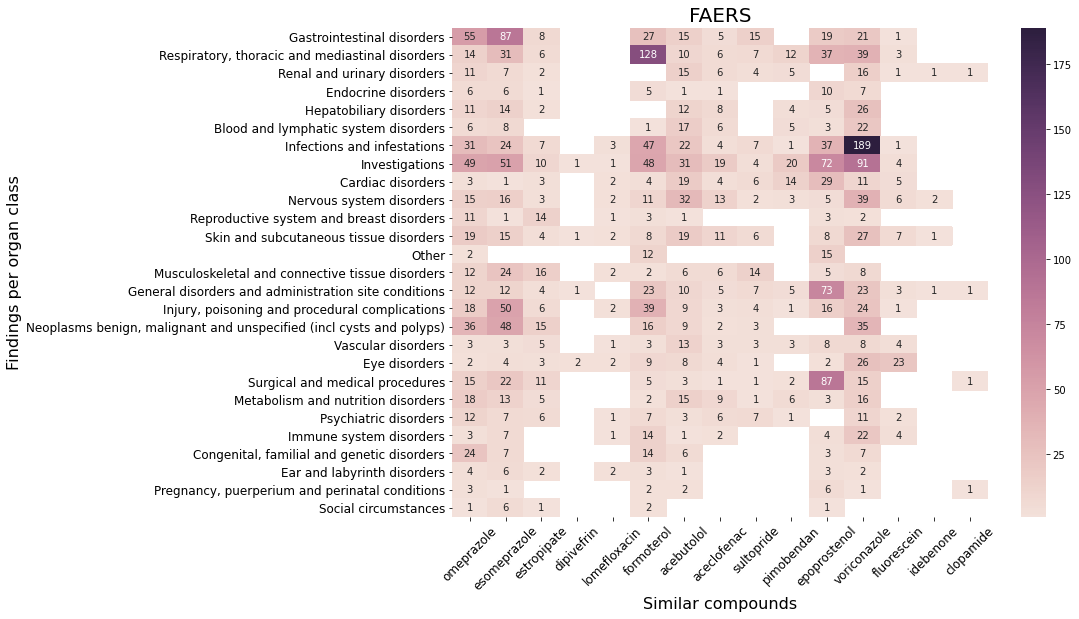

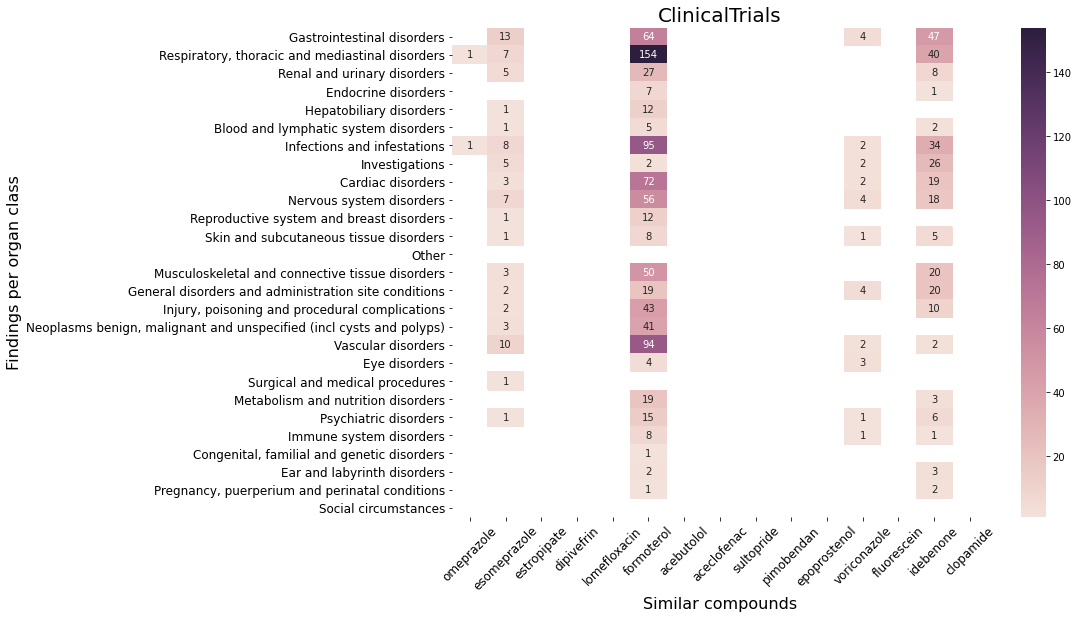

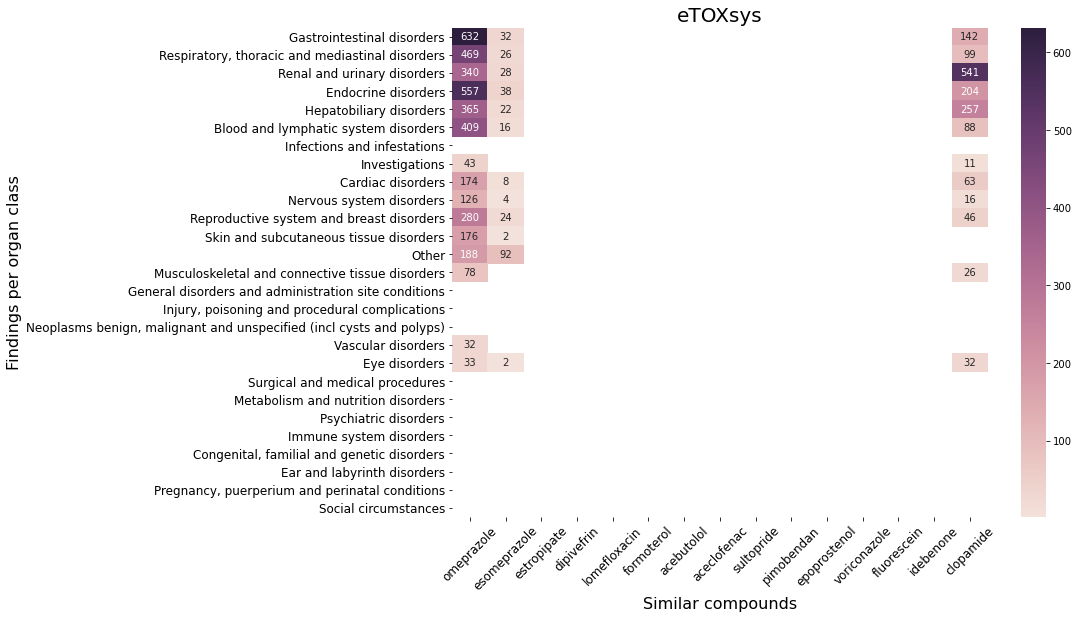

In [30]:
i = 1
for source,value in system.items():
    plt.figure(figsize=(12,9))
    data = system[source]['data']
    
    # create mask
    data_mask = ma.array(np.zeros((len(all_socs.keys()), len(all_compounds))))
    for r in range(0, len(all_socs.keys())):
        for c in range(0, len(all_compounds)):
            data_mask[r][c] = 1 if data[r][c] == 0 else 0

    colormap = sns.cubehelix_palette(as_cmap=True, light=.9)
    ax = sns.heatmap(data, 
                     mask=data_mask, 
                     yticklabels=list(all_socs.keys()), 
                     annot=True, 
                     fmt=".0f", 


    plt.ylabel("Findings per organ class", fontsize = 16)
    plt.xlabel("Similar compounds", fontsize = 16)
    i += 1
    plt.show()
    print('')
    print('')

